### Informative score and similarity analysis

In [83]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import spearmanr as scor

In [95]:
def plot_correaltions_all(dname1,name1,abs_type= '_abs',rnd_fil='_filtered',bname='progeny',sim_type='jaccard'):
    sns.set_palette('GnBu',5)
    dnames=list(set(['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP'])-set([dname1]))
    dnames.sort(reverse=True)
    activities=pd.Series()
    similiarities=pd.Series()
    sizes=pd.Series()
    dset_names=[]
    for dname in dnames:
        activity=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname,rnd_fil,abs_type),
                         sep=',',header=0,index_col=0).abs().max(1)
        if dname1<dname:
            fname=dname1+rnd_fil+'_'+dname+rnd_fil+'_'+sim_type+'.csv'
        else:
            fname=dname+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
        similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
        size=pd.read_csv('../results/genesets/single/csvs/%s%s.csv' % (dname,rnd_fil),sep=',',
                         header=0,index_col=0)
        size=size['Set'].value_counts()
        if dname1<dname:
            similarity=similarity.max(0)
        else:
            similarity=similarity.max(1)
        sets=list(set(activity.index)&set(similarity.index)) 
        activities=pd.concat([activities,activity[sets]])   
        similiarities=pd.concat([similiarities,similarity[sets]])
        print(dname,scor(activity[sets],similarity[sets]))
        sizes=pd.concat([sizes,size[sets]])
        dset_names+=[dname]*len(sets)
    plt.figure(figsize=(6,4),dpi=300)
    sns.scatterplot(similiarities,activities,hue=dset_names)#,palette='GnBu')
    if sim_type=='jaccard':
        sim_label='Jaccard index'
    else:
        sim_label='Overlap coefficient'
    plt.xlabel('Similarity to '+name1+'\n('+sim_label+')',size=15)
    plt.ylabel('Informative score',size=15)
    plt.legend(fontsize=7.5)
    print(scor(activities,similiarities))
    #print(scor(activities,sizes))
    #print(scor(similiarities,sizes))

REACTOME SpearmanrResult(correlation=0.06384507261442757, pvalue=0.015175216681762345)
KEGG SpearmanrResult(correlation=0.3559751160084643, pvalue=8.741640324587347e-07)
CGP SpearmanrResult(correlation=0.10557540958697911, pvalue=1.0320129477486561e-08)
BIOCARTA SpearmanrResult(correlation=0.2500908701208949, pvalue=1.6951463845562285e-05)
BEST_dorothea_CD SpearmanrResult(correlation=0.2699061731242667, pvalue=1.5743153462372514e-05)
SpearmanrResult(correlation=0.11873384580271744, pvalue=1.885417304062163e-17)


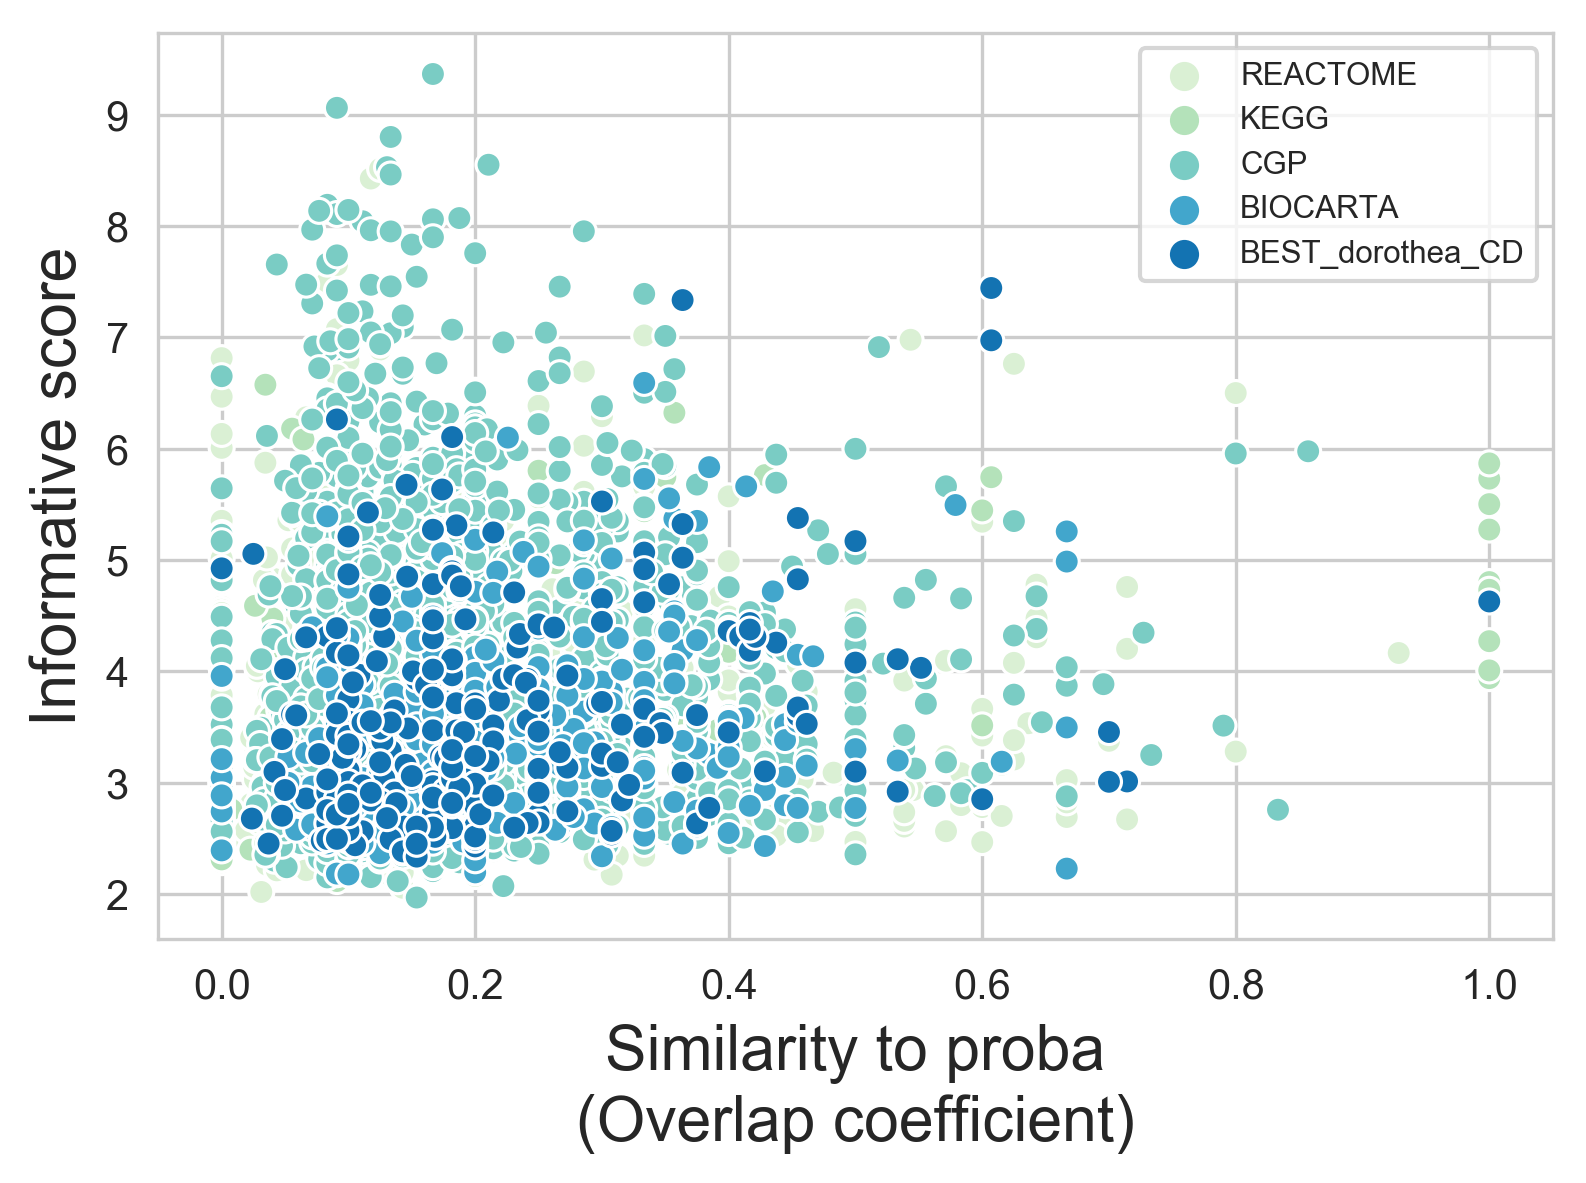

In [135]:
plot_correaltions_all('BEST_dorothea_AB','proba','_abs','_filtered','gdsc','overlap')